<center>
<h1>Week-2 Analysis - Milestone-2</h1>
<h2>DSC680</h2>
<h2>Applied Data Science</h2>
<h3>Kalyan Pothineni</h3>
</ceter>


In [3]:
import pandas as pd

# Load the dataset
file_path = 'CO2_Emissions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


### Emissions Trend over time by Sector

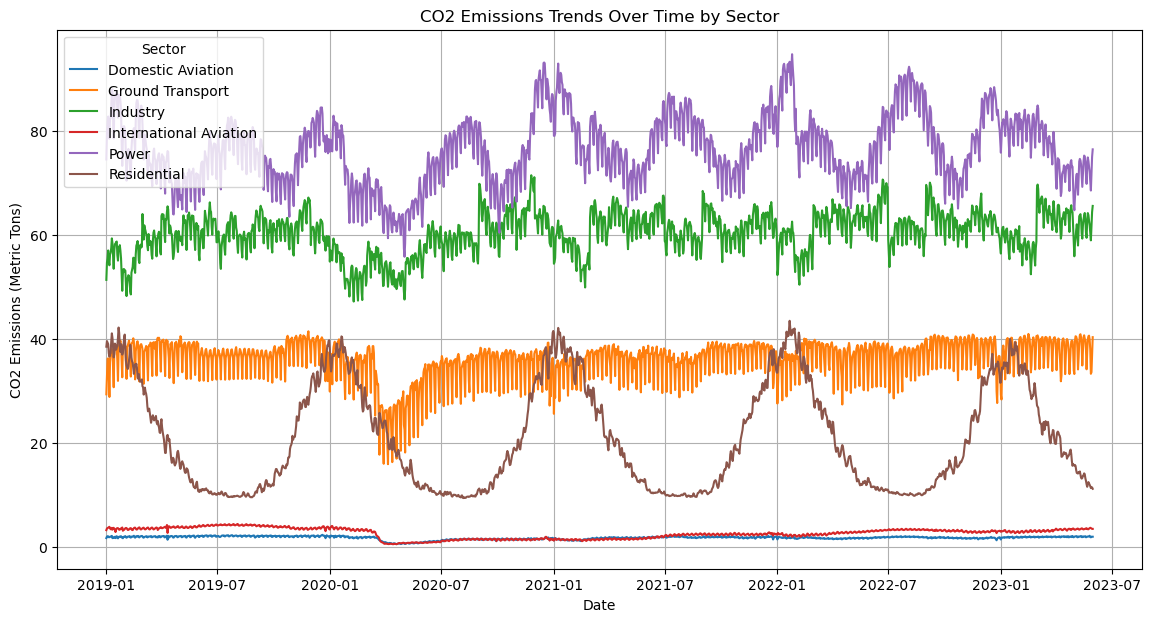

In [5]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Group the data by sector and date to get the total emissions for each sector over time
sector_trends = data.groupby(['date', 'sector'])['value'].sum().unstack()

# Line Graph: CO2 emissions trends over time for different sectors
plt.figure(figsize=(14, 7))
for sector in sector_trends.columns:
    plt.plot(sector_trends.index, sector_trends[sector], label=sector)

plt.title('CO2 Emissions Trends Over Time by Sector')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.legend(title='Sector')
plt.grid(True)
plt.show()


### Emissions by Sector

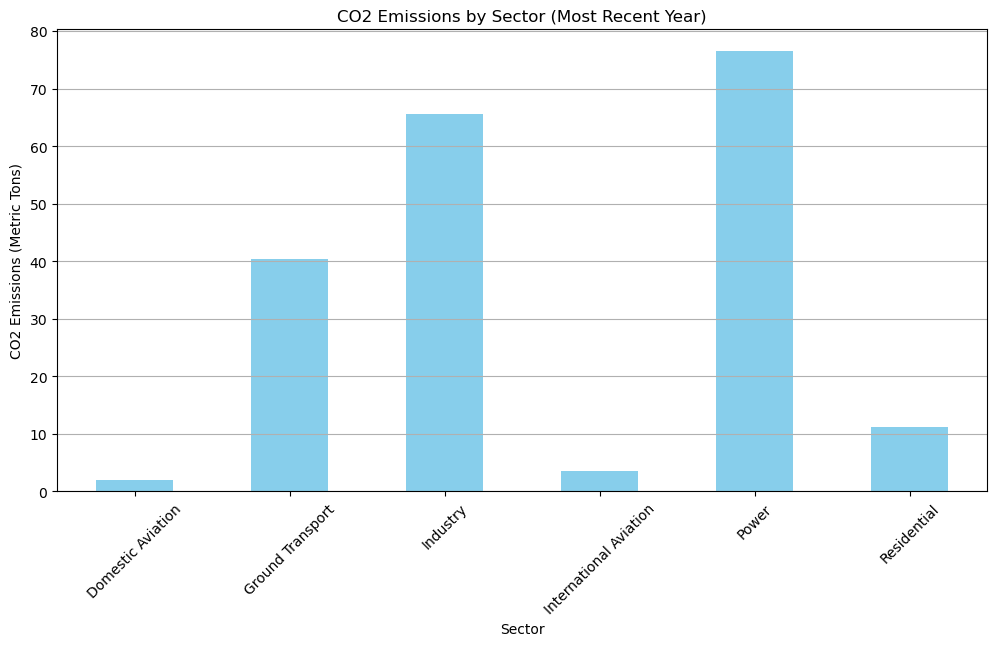

In [6]:
# Bar Chart: Compare CO2 emissions across different sectors for the most recent year in the dataset
latest_date = data['date'].max()
latest_year_data = data[data['date'] == latest_date].groupby('sector')['value'].sum()

plt.figure(figsize=(12, 6))
latest_year_data.plot(kind='bar', color='skyblue')
plt.title('CO2 Emissions by Sector (Most Recent Year)')
plt.xlabel('Sector')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Emissions by Economic Indicator

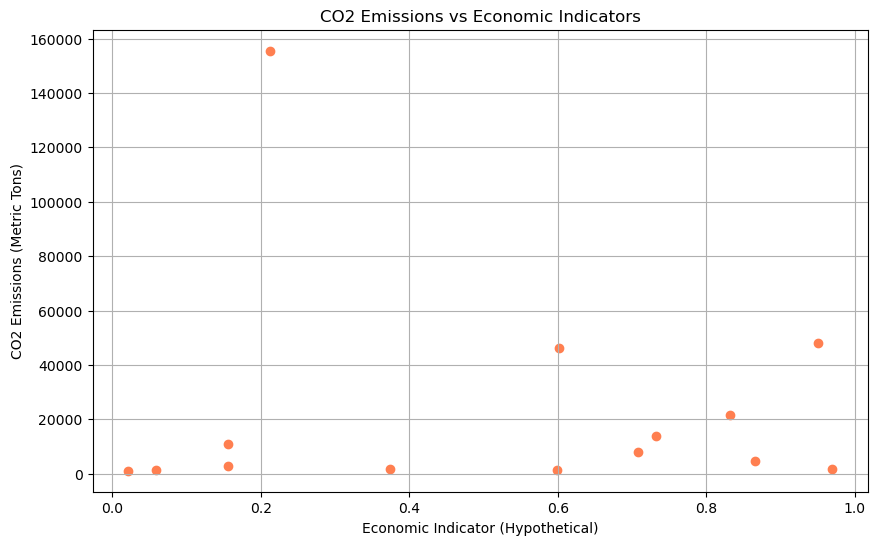

In [7]:
# Scatter Plot: Relationship between CO2 emissions and economic indicators (using random data for demonstration)
import numpy as np

# Assuming we have a hypothetical economic indicator for each country (random data for demonstration)
np.random.seed(42)
economic_indicators = np.random.rand(len(data['country'].unique()))

# Create a dataframe with the total emissions and economic indicators
emissions_by_country = data.groupby('country')['value'].sum().reset_index()
emissions_by_country['economic_indicator'] = economic_indicators

# Scatter Plot: CO2 emissions vs economic indicators
plt.figure(figsize=(10, 6))
plt.scatter(emissions_by_country['economic_indicator'], emissions_by_country['value'], color='coral')
plt.title('CO2 Emissions vs Economic Indicators')
plt.xlabel('Economic Indicator (Hypothetical)')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.grid(True)
plt.show()


### Emissions Trends by Countries

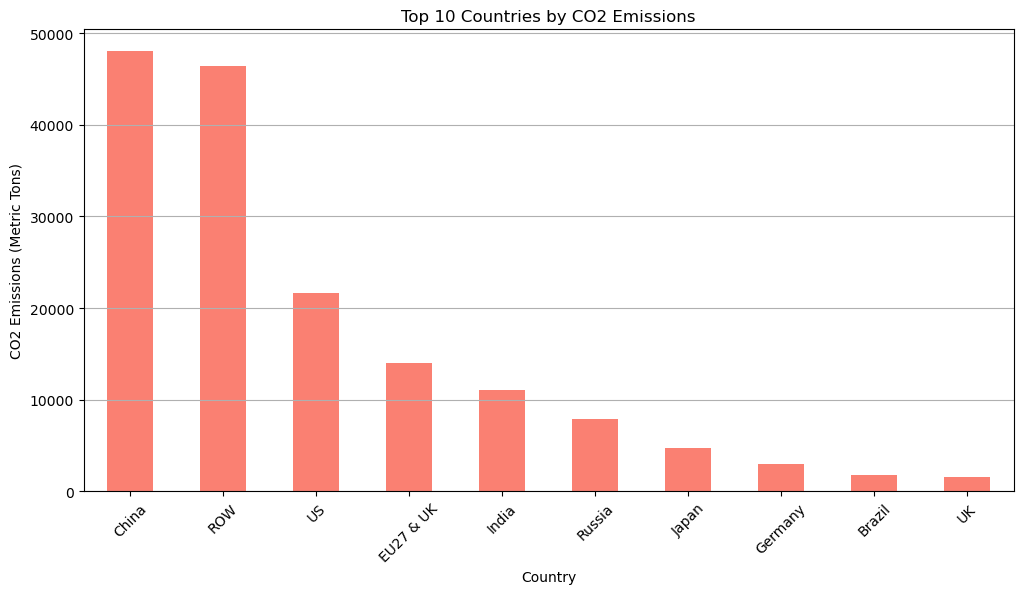

In [8]:
# Filter out "World" from the dataset
filtered_data = data[data['country'] != 'WORLD']

# Top 10 Countries by CO2 Emissions (excluding "World")
top_10_countries = filtered_data.groupby('country')['value'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries by CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


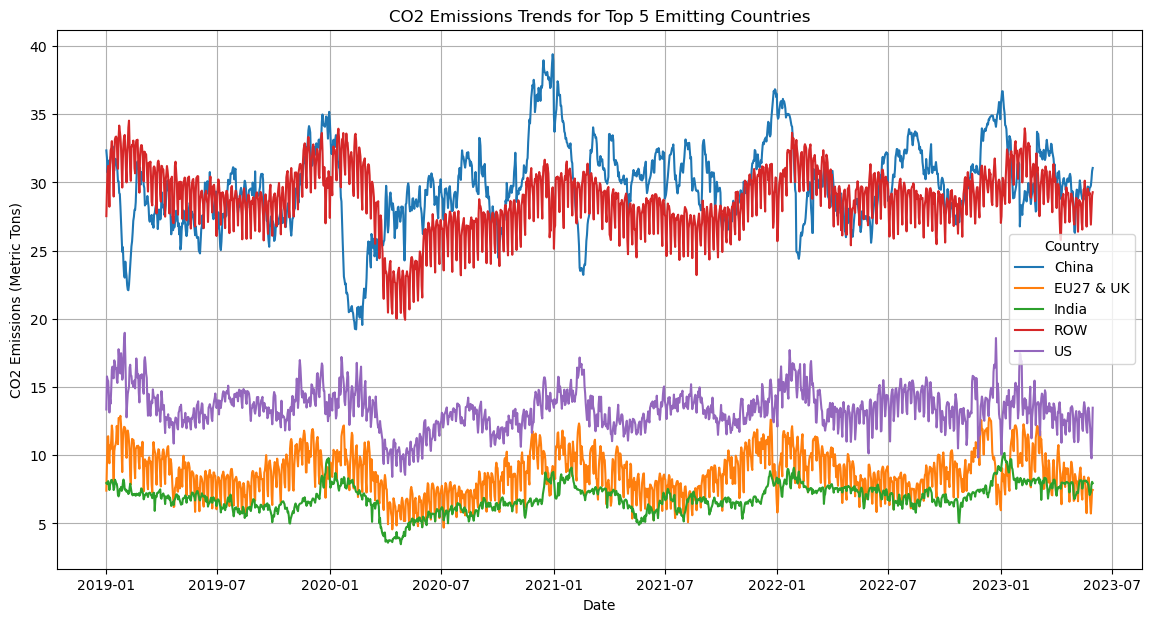

In [9]:
# CO2 Emissions Trends for Top 5 Emitting Countries (excluding "WORLD")
top_5_countries = filtered_data.groupby('country')['value'].sum().nlargest(5).index
top_5_countries_data = filtered_data[filtered_data['country'].isin(top_5_countries)]
top_5_trends = top_5_countries_data.groupby(['date', 'country'])['value'].sum().unstack()

plt.figure(figsize=(14, 7))
for country in top_5_trends.columns:
    plt.plot(top_5_trends.index, top_5_trends[country], label=country)

plt.title('CO2 Emissions Trends for Top 5 Emitting Countries')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


### Emissions by sector

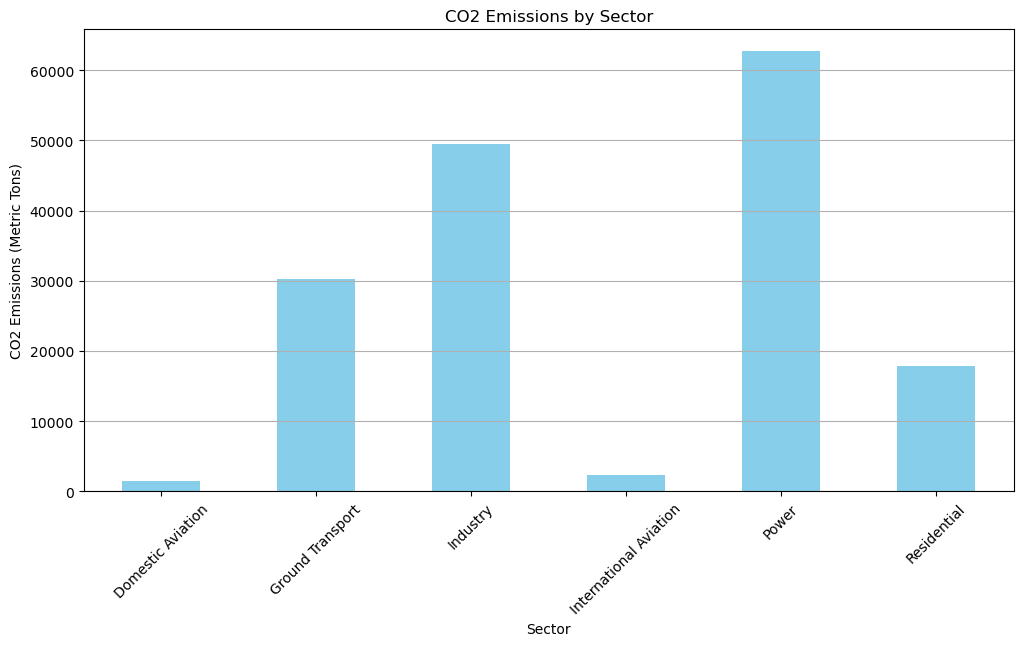

In [10]:
# CO2 Emissions by Sector (excluding "World")
emissions_by_sector = filtered_data.groupby('sector')['value'].sum()

plt.figure(figsize=(12, 6))
emissions_by_sector.plot(kind='bar', color='skyblue')
plt.title('CO2 Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Regression Models: Predict Future Emission Trends Based on Historical Data

Mean Squared Error: 1775956.8647349465


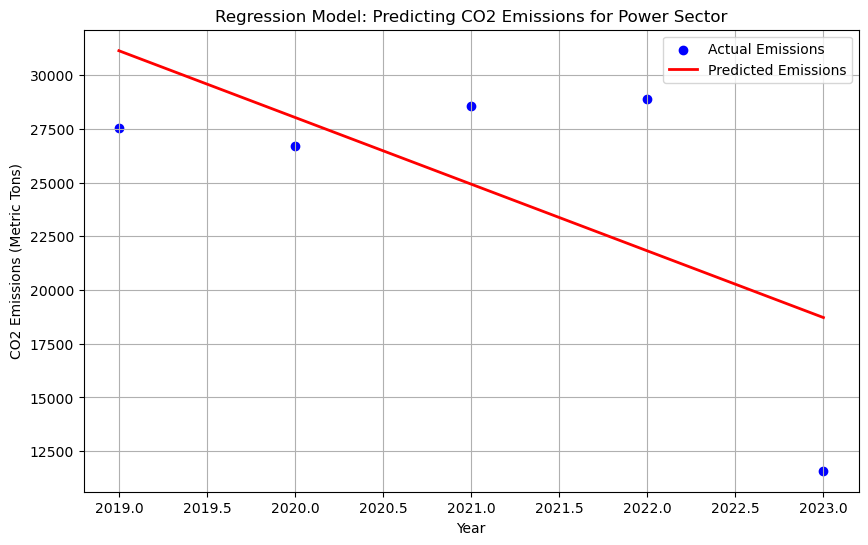

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for regression model
data['year'] = data['date'].dt.year
regression_data = data.groupby(['year', 'sector'])['value'].sum().reset_index()

# For simplicity, we'll focus on the Power sector
power_data = regression_data[regression_data['sector'] == 'Power']

# Define features and target
X = power_data[['year']]
y = power_data['value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Emissions')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicted Emissions')
plt.title('Regression Model: Predicting CO2 Emissions for Power Sector')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for regression model
data['year'] = data['date'].dt.year
regression_data = data.groupby(['year', 'sector'])['value'].sum().reset_index()

# For simplicity, we'll focus on the Power sector
power_data = regression_data[regression_data['sector'] == 'Power']

# Define features and target
X = power_data[['year']]
y = power_data['value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)

# Regression results
coefficients = model.coef_
intercept = model.intercept_

mse, coefficients, intercept


(1775956.8647349465, array([-3104.3410394]), 6298801.106353998)

The regression model predicts future CO2 emissions for the Power sector with a Mean Squared Error of 1,775,957. The coefficient of -3104.34 indicates a decreasing trend, while the intercept of 6,298,801 represents the baseline emissions.

### With filtered dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for regression model
filtered_data['year'] = filtered_data['date'].dt.year
regression_data = filtered_data.groupby(['year', 'sector'])['value'].sum().reset_index()

# For simplicity, we'll focus on the Power sector
power_data = regression_data[regression_data['sector'] == 'Power']

# Define features and target
X = power_data[['year']]
y = power_data['value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)

# Regression results
coefficients = model.coef_
intercept = model.intercept_

mse, coefficients, intercept

C:\Users\iamka\AppData\Local\Temp\ipykernel_10788\26171333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['date'].dt.year


(492280.6099069007, array([-1583.4326194]), 3212796.5377539992)